**Context:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a
speci ic monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then
feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and
trying out different combinations of features, essential signals that are impacting the yield type can be identi ied.

In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## Q1 A

In [2]:
#Reading The sensore Data of semiconductor manufacture
sensore_data= pd.read_csv('signal-data.csv')

In [3]:
sensore_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## Q1 B

In [4]:
sensore_data.describe()
#One Columns has missing  that is Time

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [5]:
sensore_data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [6]:
print("dublicate count",sensore_data.count())
print()
print(sensore_data.duplicated().value_counts())

dublicate count Time         1567
0            1561
1            1560
2            1553
3            1553
             ... 
586          1566
587          1566
588          1566
589          1566
Pass/Fail    1567
Length: 592, dtype: int64

False    1567
dtype: int64


In [7]:
#Time Fild which have object Datatype
sensore_data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [8]:
sensore_data.Time
sensore_data=sensore_data.drop(['Time'], axis=1)

In [9]:
#Number of mission value each rows columns
sensore_data.isna().apply(sensore_data.value_counts) 

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
False,1561,1560,1553,1553,1553,1553,1553,1558,1565,1565,...,618,1566,1566,1566,1566,1566,1566,1566,1566,1567.0
True,6,7,14,14,14,14,14,9,2,2,...,949,1,1,1,1,1,1,1,1,NaN


In [10]:
#Inpute Median values in NaN veriable
onlyValues = sensore_data.values
X=onlyValues[:,0:589]
y=onlyValues[:,590]
imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
imputer.fit(X)
# Imputing the data 
after_input_data = imputer.transform(X)
after_input_data = pd.DataFrame(after_input_data)
after_input_data

,0,1,2,3,4,5,6,7,8,9,...,579,580,581,582,583,584,585,586,587,588
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0148,0.0047,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0148,0.0047,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0138,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0148,0.0047,72.2889,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,0.0086,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0245,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075


In [11]:
#sensore_data['Pass/Fail']
print("Before input\n")
count_nan = sensore_data['Pass/Fail'].isna().sum()
print("Total Null", sensore_data.isna().sum().sum())
print ('Pass/Fail of NaN: ' + str(count_nan))
print("\nAfter input\n")
print("Total Null", after_input_data.isna().sum().sum())
after_input_data

Before input

Total Null 41951
Pass/Fail of NaN: 0

After input

Total Null 0


,0,1,2,3,4,5,6,7,8,9,...,579,580,581,582,583,584,585,586,587,588
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0148,0.0047,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0148,0.0047,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0138,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0148,0.0047,72.2889,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,0.0086,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0245,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075


In [12]:
unique_val = sensore_data['Pass/Fail'].unique()
print(unique_val)

[-1  1]


"-1" is house signal line is Correct  
"1" is house  signal line is Fail

In [13]:
#this will seperating signal  yes or no data target[0] means  singnal yes data targ[1] will be siganl no data
targets = [sensore_data.loc[sensore_data['Pass/Fail'] == val] for val in unique_val]

Text(0.5, 1.0, 'eight Sensor Measurements')

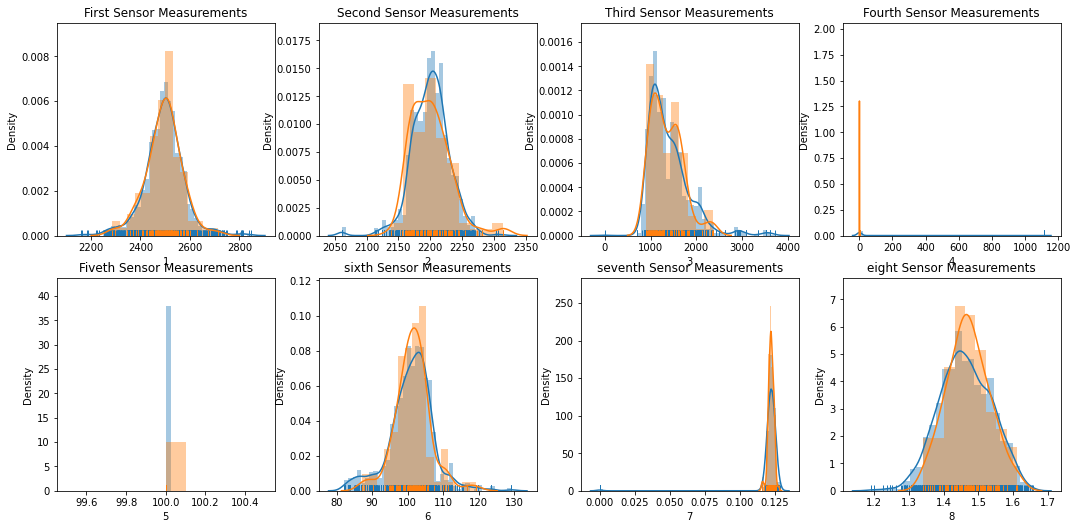

In [14]:
fig = plt.figure(figsize=(18,18))
plt.subplot(4, 4, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 12)

plt.subplot(4, 4, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 12)

plt.subplot(4, 4, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 12)

plt.subplot(4, 4, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 12)

plt.subplot(4, 4, 5)
for target in targets:
    sns.distplot(target['5'], hist=True, rug=True)
plt.title('Fiveth Sensor Measurements', fontsize = 12)

plt.subplot(4, 4, 6)
for target in targets:
    sns.distplot(target['6'], hist=True, rug=True)
plt.title('sixth Sensor Measurements', fontsize = 12)

plt.subplot(4, 4, 7)
for target in targets:
    sns.distplot(target['7'], hist=True, rug=True)
plt.title('seventh Sensor Measurements', fontsize = 12)

plt.subplot(4, 4, 8)
for target in targets:
    sns.distplot(target['8'], hist=True, rug=True)
plt.title('eight Sensor Measurements', fontsize = 12)


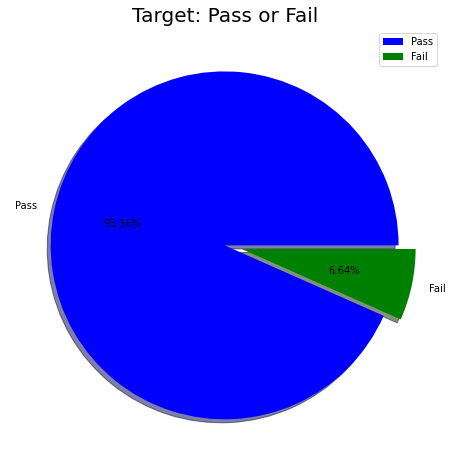

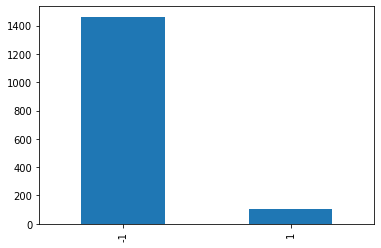

In [15]:
#Visualizing Content in  Connected line and  Not connected line Percentage
fig = plt.figure(figsize=(8,8))
labels = ['Pass', 'Fail']
size = sensore_data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
sensore_data['Pass/Fail'].value_counts().plot(kind="bar")
plt.show()

** Q2 A 20% colum data taken from origianal dataset

In [16]:
row_no, col_no=after_input_data.shape
df_sensore_data=after_input_data[after_input_data.columns[0:round(20/100 * col_no)]]
df_sensore_data

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.3196,0.9810,101.4817,231.2012,0.46285,0.9460,0.0,748.6115,0.9908,58.4306
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,-0.0903,0.9810,101.4817,231.2012,0.46285,0.9425,0.0,731.2517,0.9902,58.6680
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,-0.0728,0.9810,101.4817,231.2012,0.46840,0.9231,0.0,718.5777,0.9899,58.4808
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,-0.1180,0.9810,101.4817,231.2012,0.46470,0.9564,0.0,709.0867,0.9906,58.6635
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,-0.2038,0.9810,101.4817,231.2012,0.46285,0.9424,0.0,796.5950,0.9908,58.3858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,-0.1257,0.9833,102.0542,231.1404,0.46285,0.9520,0.0,727.6761,0.9894,58.3514
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,-0.0290,0.9824,97.5426,235.2582,0.46285,0.9561,0.0,755.7527,0.9899,57.1020
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,0.0486,0.9839,101.4167,231.2249,0.46285,0.9488,0.0,704.2686,0.9891,59.2046
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,-0.0219,0.9828,101.3445,233.0335,0.46285,0.9485,0.0,605.6190,0.9896,58.2686


**Q2 B - Identify and drop the features which are having same value for all the rows.**

In [17]:
df_sensore_data.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.3196,0.9810,101.4817,231.2012,0.46285,0.9460,0.0,748.6115,0.9908,58.4306
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,-0.0903,0.9810,101.4817,231.2012,0.46285,0.9425,0.0,731.2517,0.9902,58.6680
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,-0.0728,0.9810,101.4817,231.2012,0.46840,0.9231,0.0,718.5777,0.9899,58.4808
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,-0.1180,0.9810,101.4817,231.2012,0.46470,0.9564,0.0,709.0867,0.9906,58.6635
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,-0.2038,0.9810,101.4817,231.2012,0.46285,0.9424,0.0,796.5950,0.9908,58.3858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,-0.1257,0.9833,102.0542,231.1404,0.46285,0.9520,0.0,727.6761,0.9894,58.3514
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,-0.0290,0.9824,97.5426,235.2582,0.46285,0.9561,0.0,755.7527,0.9899,57.1020
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,0.0486,0.9839,101.4167,231.2249,0.46285,0.9488,0.0,704.2686,0.9891,59.2046
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,-0.0219,0.9828,101.3445,233.0335,0.46285,0.9485,0.0,605.6190,0.9896,58.2686


In [18]:
uniqueValues = df_sensore_data.nunique()
print(uniqueValues)

0      1520
1      1505
2       507
3       518
4       503
       ... 
113     468
114      20
115    1567
116     136
117    1527
Length: 118, dtype: int64


**Q2 D - Check for multi-collinearity in the data and take necessary action **

In [19]:
def remove_collinear_features(x, threshold):
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    return x

In [20]:
#Remove columns having more than 90% correlation
#Both positive and negative correlations are considered here
data_90 = remove_collinear_features(df_sensore_data,0.90)
data_90

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.3196,0.9810,101.4817,231.2012,0.46285,0.9460,0.0,748.6115,0.9908,58.4306
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,-0.0903,0.9810,101.4817,231.2012,0.46285,0.9425,0.0,731.2517,0.9902,58.6680
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,-0.0728,0.9810,101.4817,231.2012,0.46840,0.9231,0.0,718.5777,0.9899,58.4808
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,-0.1180,0.9810,101.4817,231.2012,0.46470,0.9564,0.0,709.0867,0.9906,58.6635
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,-0.2038,0.9810,101.4817,231.2012,0.46285,0.9424,0.0,796.5950,0.9908,58.3858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,-0.1257,0.9833,102.0542,231.1404,0.46285,0.9520,0.0,727.6761,0.9894,58.3514
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,-0.0290,0.9824,97.5426,235.2582,0.46285,0.9561,0.0,755.7527,0.9899,57.1020
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,0.0486,0.9839,101.4167,231.2249,0.46285,0.9488,0.0,704.2686,0.9891,59.2046
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,-0.0219,0.9828,101.3445,233.0335,0.46285,0.9485,0.0,605.6190,0.9896,58.2686


In [21]:
data_90.shape

(1567, 108)

## Q3 B Data analysis & visualisation here only 20 col data visualize

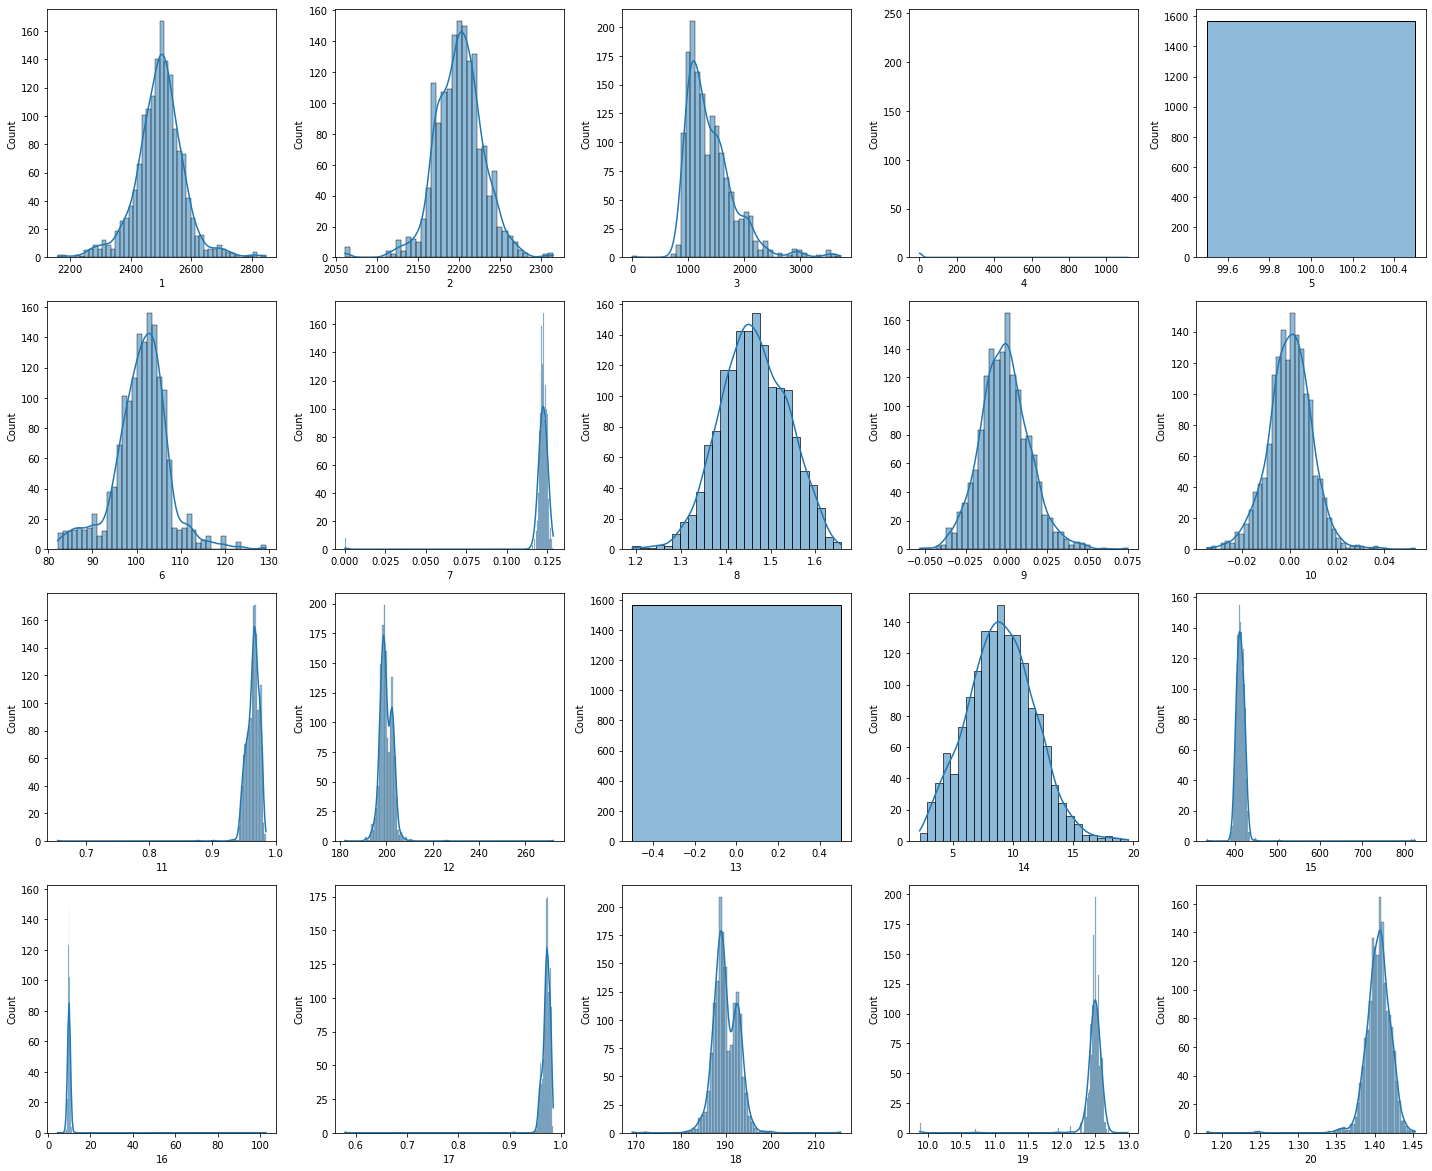

In [22]:
cols = 5
rows = 5
num_cols =  np.arange(1,21)
fig = plt.figure( figsize=(20, 20))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x = data_90[col], kde=True, ax = ax)
fig.tight_layout()  
plt.show()

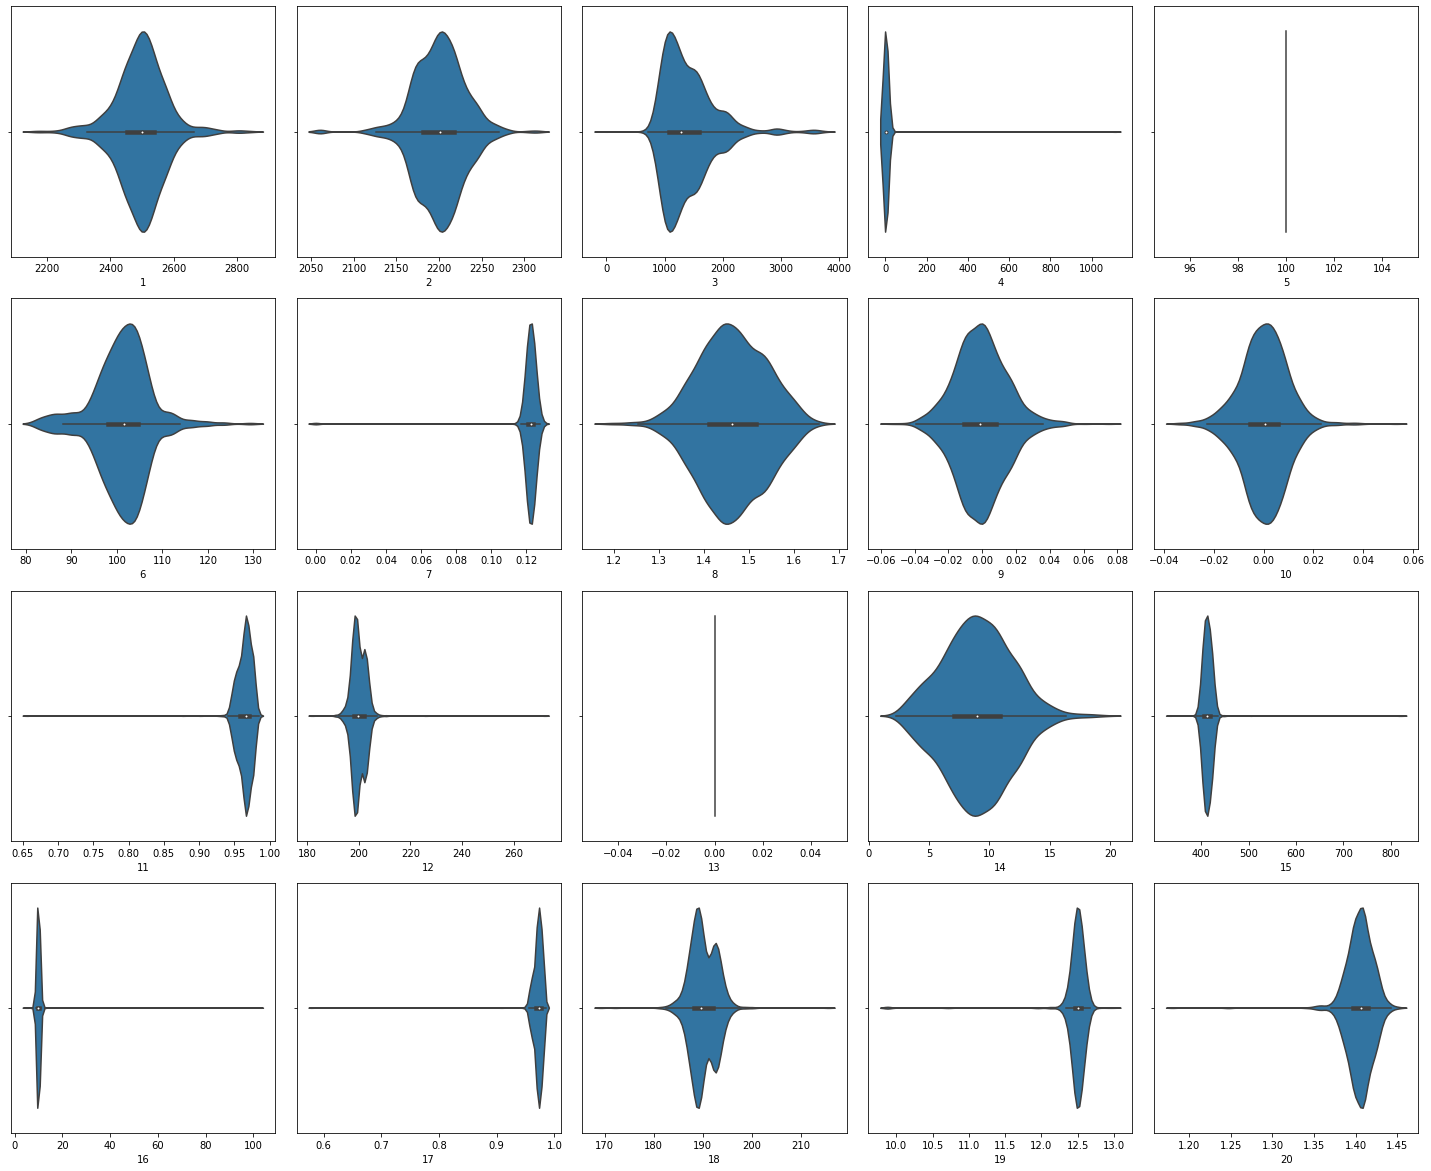

In [23]:
cols = 5
rows = 5
num_cols = np.arange(1,21)
fig = plt.figure( figsize=(20, 20))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.violinplot(x = data_90[col], ax = ax)
fig.tight_layout()  
plt.show()

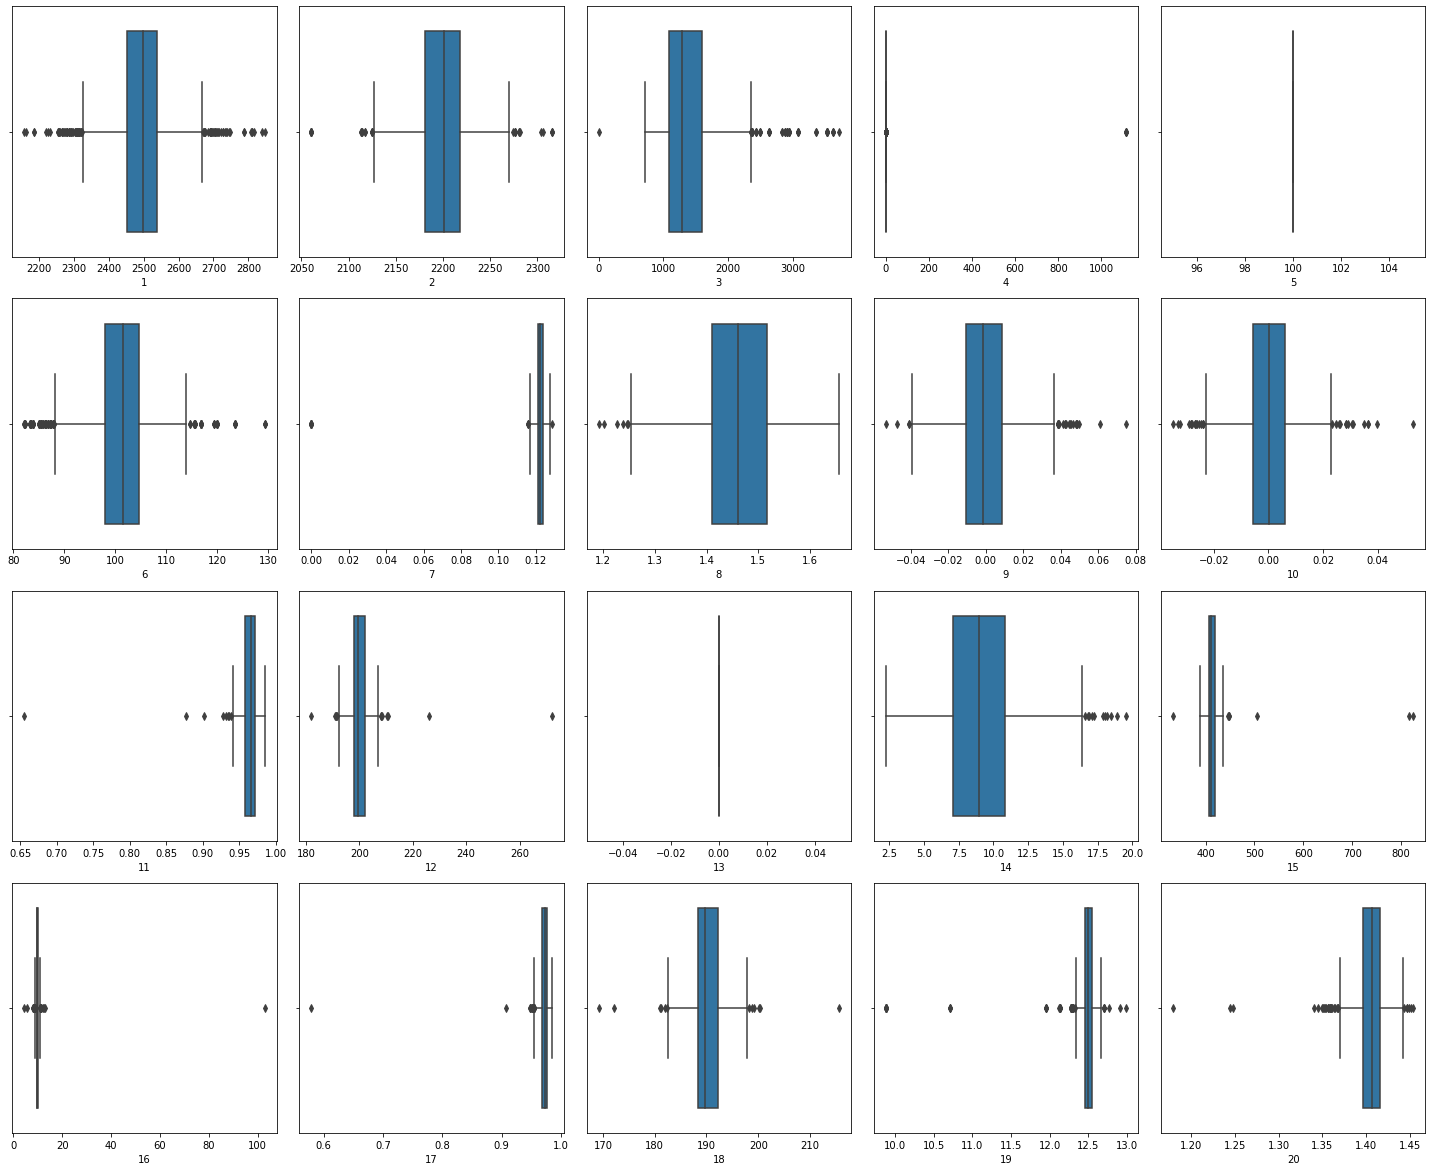

In [24]:
cols = 5
rows = 5
num_cols = np.arange(1,21)
fig = plt.figure( figsize=(20, 20))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = data_90[col], ax = ax)
fig.tight_layout()  
plt.show()

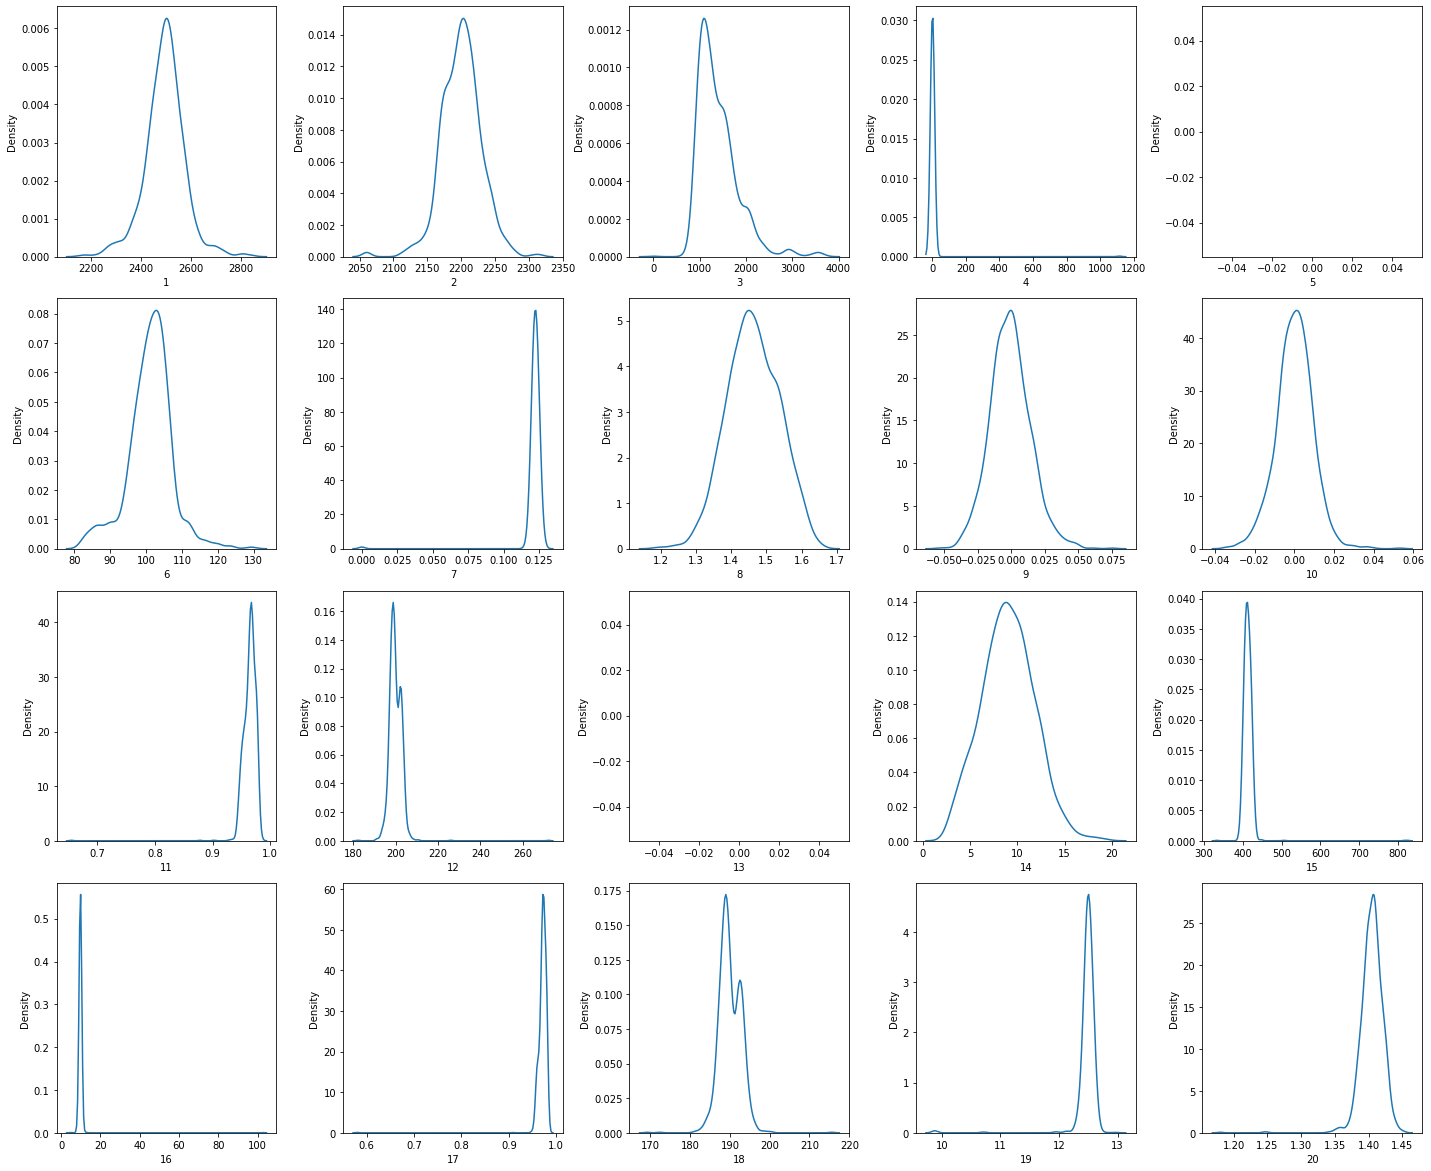

In [25]:
cols = 5
rows = 5
num_cols = np.arange(1,21)
fig = plt.figure( figsize=(20, 20))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x = data_90[col], ax = ax)
fig.tight_layout()  
plt.show()

In [26]:
df_sensore_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.441551,2495.866110,2200.551958,1395.383474,4.171281,100.0,101.116476,0.121825,1.462860,-0.000842,...,-0.010790,0.980647,101.424436,231.417611,0.459962,0.945424,0.000123,747.383792,0.987130,58.625908
std,73.480841,80.228143,29.380973,439.837330,56.103721,0.0,6.209385,0.008936,0.073849,0.015107,...,0.086591,0.005166,1.114905,1.279821,0.036174,0.012133,0.001668,48.949250,0.009497,6.485174
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,-0.345400,0.784800,88.193800,213.008300,0.000000,0.853400,0.000000,544.025400,0.890000,52.806800
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,-0.064400,0.981000,101.481700,231.201200,0.462400,0.938600,0.000000,721.023000,0.989500,57.978300
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,-0.011200,0.981000,101.481700,231.201200,0.462850,0.946400,0.000000,750.861400,0.990500,58.549100
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.0,104.530000,0.123800,1.516850,0.008400,...,0.037850,0.981000,101.481700,231.201200,0.463400,0.952300,0.000000,776.781850,0.990900,59.133900
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.393800,0.984200,106.922700,236.954600,0.488500,0.976300,0.041400,924.531800,0.992400,311.734400


## Q4 A Data Seperation Test and Train

In [27]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(after_input_data)
df_scaler_data = pd.DataFrame(scaler_data)
X=df_scaler_data
target=y
print("X data:",X.shape)
print("Y data:", target.shape)

X data: (1567, 589)
Y data: (1567,)


In [28]:
#Q4 C
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [29]:
print("X Train:",X_train.shape)
print("X Test:", X_test.shape)

print("y train:",y_train.shape)
print("y test:", y_test.shape)

X Train: (1096, 589)
X Test: (471, 589)
y train: (1096,)
y test: (471,)


## Q4 B Under sampling and Over sampling Analysis

In [30]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import mean

In [31]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({-1.0: 1023, 1.0: 73})
After undersampling:  Counter({-1.0: 73, 1.0: 73})


In [32]:
#under sampling SVC Model fitting  
model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

ROC AUC score for undersampled data:  0.5616935483870967


In [33]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))
# define oversampling strategy
SMOTE = SMOTE()
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({-1.0: 1023, 1.0: 73})
After oversampling:  Counter({1.0: 1023, -1.0: 1023})


In [34]:
#OverSamppling SVC Model fitting 
model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)
print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

ROC AUC score for oversampled SMOTE data:  0.49886363636363634


In [35]:
# define pipeline
model = SVC()
over = RandomOverSampler(sampling_strategy=0.1)
under= RandomUnderSampler()
steps = [('o',over),('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

ROC AUC score for the combined sampling method: 0.518


## Q4 B

In [36]:
#Using KNN
from imblearn.over_sampling import SMOTE
print("Before UpSamling count Signal Connection  Fail '1':{}".format(sum(y_train==1)))
print("Before UpSamling  count Signal Connection Pass '-1':{}".format(sum(y_train==-1)))

# K-neibor class will generate minority class 
smot = SMOTE(sampling_strategy = 1, k_neighbors = 5, random_state=1)
X_train_res, y_train_res= smot.fit_resample(X_train, y_train) 

print()
print("After UpSamling count Signal Connection  Fail '1':{}".format(sum(y_train_res==1)))
print("After UpSamling  count Signal Connection Pass '-1':{}".format(sum(y_train_res==-1)))
print()
print("After UpSamling X Train shape  :{}".format(X_train_res.shape))
print("After UpSamling  y Train shape :{}".format(y_train_res.shape))

Before UpSamling count Signal Connection  Fail '1':73
Before UpSamling  count Signal Connection Pass '-1':1023

After UpSamling count Signal Connection  Fail '1':1023
After UpSamling  count Signal Connection Pass '-1':1023

After UpSamling X Train shape  :(2046, 589)
After UpSamling  y Train shape :(2046,)


In [37]:
#PipeLine Model Fitting
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for ovr in over_values:
  for undr in under_values:
    # define pipeline
    model = SVC()
    over_smt = SMOTE(sampling_strategy=ovr)
    under_sam = RandomUnderSampler(sampling_strategy=undr)
    steps = [('over', over_smt), ('under', under_sam), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (ovr, undr, score))


SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.464
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.466
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.475
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.453
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.478
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.461
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.469
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.480
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.473


Test dataset Model Score:: 0.9002123142250531
              precision    recall  f1-score   support

        -1.0       0.94      0.95      0.95       440
         1.0       0.21      0.19      0.20        31

    accuracy                           0.90       471
   macro avg       0.58      0.57      0.58       471
weighted avg       0.90      0.90      0.90       471

Confusion Matrix of testDataset Prediction:
 [[418  22]
 [ 25   6]]


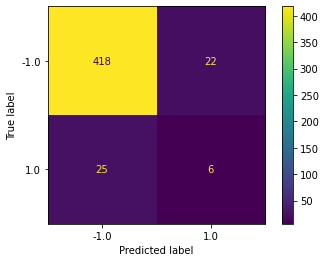

In [38]:
#Creating Model from the  Original dataset
from sklearn.metrics import plot_confusion_matrix
ogmodel = LogisticRegression()
ogmodel.fit(X_train,y_train)
og_ypredic = ogmodel.predict(X_test)
og_model_score = ogmodel.score(X_test,y_test)
print("Test dataset Model Score::", og_model_score)
print(classification_report(y_test, og_ypredic))

print("Confusion Matrix of testDataset Prediction:\n",confusion_matrix(y_test,og_ypredic))
plot_confusion_matrix(ogmodel, X_test, y_test)  
plt.show()

Test dataset Model Score:: 0.8789808917197452
              precision    recall  f1-score   support

        -1.0       0.95      0.92      0.93       440
         1.0       0.19      0.26      0.22        31

    accuracy                           0.88       471
   macro avg       0.57      0.59      0.58       471
weighted avg       0.90      0.88      0.89       471

Confusion Matrix of testDataset Prediction:
 [[406  34]
 [ 23   8]]


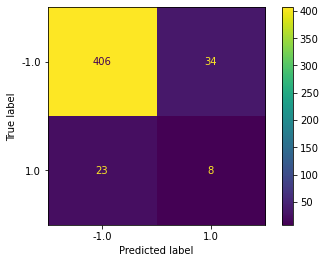

In [39]:
#upsampling Model fitting
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
ups_y_predic = model.predict(X_test)
ups_model_score = model.score(X_test,y_test)
print("Test dataset Model Score::", ups_model_score)
print(classification_report(y_test, ups_y_predic))
print("Confusion Matrix of testDataset Prediction:\n",confusion_matrix(y_test,ups_y_predic))
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

## Q5 B

In [40]:
#K-Fold Iteration Crass-validation Logistic Regration Best Accurancy 
from sklearn.model_selection import KFold
num_folds=50
kfold = KFold(n_splits=num_folds, random_state=None, shuffle=False)
lr_model = LogisticRegression()
results= cross_val_score(lr_model,X,y, cv=kfold)
print(results)
print("Accurancy: %.3f%%  (%.3f%%)" %(results.mean()*100, results.std()*100))

[0.59375    0.75       0.6875     0.84375    0.84375    0.75
 0.625      0.6875     0.9375     0.84375    0.75       0.71875
 0.84375    0.9375     0.90625    0.9375     0.96875    1.
 0.90322581 0.96774194 0.93548387 0.96774194 1.         0.96774194
 1.         0.90322581 0.87096774 1.         0.93548387 0.83870968
 1.         1.         0.90322581 0.93548387 0.90322581 0.96774194
 0.90322581 0.83870968 0.80645161 0.83870968 0.83870968 0.90322581
 0.80645161 0.90322581 0.96774194 0.93548387 0.96774194 1.
 0.90322581 0.96774194]
Accurancy: 88.411%  (10.097%)


In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True)
results= cross_val_score(lasso_reg,X,y, cv=kfold)
print(results)
print("Accurancy: %.3f%%  (%.3f%%)" %(results.mean(), results.std()))

[-6.38593639e-02 -2.38038636e-01 -2.66216795e-04 -2.66216795e-04
 -3.27536632e-02 -1.41594241e-01 -2.66216795e-04 -1.87418576e-01
 -9.19612916e-03 -2.66216795e-04 -1.41594241e-01 -2.66216795e-04
 -2.66216795e-04 -2.66216795e-04 -4.24561157e-02 -2.66216795e-04
 -4.24561157e-02  0.00000000e+00 -3.63649596e-02 -3.87919249e-02
  0.00000000e+00  0.00000000e+00 -3.87919249e-02  0.00000000e+00
  0.00000000e+00 -5.91935783e-05 -5.91935783e-05 -3.87919249e-02
 -3.87919249e-02 -1.10077681e-02  0.00000000e+00  0.00000000e+00
 -3.87919249e-02 -3.87919249e-02  0.00000000e+00  0.00000000e+00
 -5.91935783e-05 -5.91935783e-05 -3.87919249e-02 -6.93209428e-02
  0.00000000e+00 -5.91935783e-05 -1.51339094e-01 -1.10077681e-02
 -3.87919249e-02 -3.87919249e-02 -3.87919249e-02  0.00000000e+00
 -3.87919249e-02  0.00000000e+00]
Accurancy: -0.032%  (0.052%)


In [42]:
#cheking mean square error multicollinearity L2 Regration 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-0.2995138828565442


In [43]:
#GridSeach Examples
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
pram_grid = {'n_neighbors': list (range(1,9)), 'algorithm': ('auto','ball_tree','kd_tree','brute') }
grid_search = GridSearchCV(knn_clf,pram_grid, cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [44]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 2}

In [45]:
grid_search.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [46]:
grid_search.cv_results_['mean_test_score']

array([0.9042035 , 0.93613845, 0.92608007, 0.93249374, 0.92975813,
       0.93431193, 0.93522102, 0.93340284, 0.9042035 , 0.93613845,
       0.92608007, 0.93249374, 0.92975813, 0.93431193, 0.93522102,
       0.93340284, 0.9042035 , 0.93613845, 0.92608007, 0.93249374,
       0.92975813, 0.93431193, 0.93522102, 0.93340284, 0.9042035 ,
       0.93613845, 0.92608007, 0.93249374, 0.92975813, 0.93431193,
       0.93522102, 0.93340284])

In [47]:
print("Height Accurancy: %.3f%%" %(max(grid_search.cv_results_['mean_test_score']) * 100))

Height Accurancy: 93.614%


In [48]:
#using RandomSeachCV finding best parameter 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

randomforest_clf = RandomForestClassifier(n_estimators=50)
param_dist = { "max_depth": [3,None],
               "max_features": sp_randint(1,11),
               "min_samples_split": sp_randint(2,11),
               "min_samples_leaf": sp_randint(1,11),
               "bootstrap":[True,False],
               "criterion": ["gini","entropy"]
             }

samples = 10
randomCV = RandomizedSearchCV(randomforest_clf, param_distributions=param_dist, n_iter=samples, cv=5)
randomCV.fit(X,y)
print(randomCV.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 9}


In [49]:
print("All score list:")
print(randomCV.cv_results_['mean_test_score'])
print("\n Height Accurancy: %.3f%%" %(max(randomCV.cv_results_['mean_test_score']) * 100))

All score list:
[0.93363179 0.93363179 0.93363179 0.93363179 0.93363179 0.93363179
 0.93363179 0.93363179 0.93363179 0.93363179]

 Height Accurancy: 93.363%


## Q5 D

In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([ ('std_scaler', StandardScaler()), ('PCA',PCA(n_components=42)), ('logistic_reg',LogisticRegression(random_state=5))])
pipe_lr.fit(X_train,y_train)

test_score = pipe_lr.score(X_test,y_test)
train_score = pipe_lr.score(X_train,y_train)

print(f"Accurancy test setData {test_score}")
print(f"Accurancy train setData {train_score}")

Accurancy test setData 0.9320594479830149
Accurancy train setData 0.9324817518248175


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
scoring_mae = 'neg_mean_absolute_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results_mae = cross_val_score(model, X, y, cv=kfold, scoring=scoring_mae)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))
print("MAE: %.3f (%.3f)" % (results_mae.mean(), results_mae.std()))

MSE: -259759447120245830975488.000 (779278341360737459372032.000)
MAE: -12862809849.498 (38588429541.418)


## Q5 F List of Model fitting

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
lr_score = logreg.score(X_test, y_test)
lr_train_score = logreg.score(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
lr_recall = round(tp/(tp+fn),3)   
lr_precision = round(tp/(tp+fp),3) 
lr_specificity =round(tn/(tn+fp),3) 

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Test Accuracy' : [lr_score], 'Train Accuracy':[lr_train_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.25,0.226,0.952,0.048


In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95       440
         1.0       0.25      0.23      0.24        31

    accuracy                           0.90       471
   macro avg       0.60      0.59      0.59       471
weighted avg       0.90      0.90      0.90       471



In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
dt_train_score = dt.score(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
dt_recall = round(tp/(tp+fn), 3)  
dt_precision = round(tp/(tp+fp), 3)  
dt_specificity =round(tn/(tn+fp),3)

result.loc[1] = ['Decision Tree', dt_score, dt_train_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.250,0.226,0.952,0.048
1,Decision Tree,0.870488,1.000000,0.105,0.129,0.923,0.077


In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93       440
         1.0       0.11      0.13      0.12        31

    accuracy                           0.87       471
   macro avg       0.52      0.53      0.52       471
weighted avg       0.88      0.87      0.88       471



In [56]:
#DecisionTreeClassifire with Parameter
dt = DecisionTreeClassifier(max_depth= 4, random_state=1)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
dt_train_score = dt.score(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
dt_recall = round(tp/(tp+fn), 3)  
dt_precision = round(tp/(tp+fp), 3)  
dt_specificity =round(tn/(tn+fp),3)

result.loc[2] = ['Decision Tree with parameter', dt_score, dt_train_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.250,0.226,0.952,0.048
1,Decision Tree,0.870488,1.000000,0.105,0.129,0.923,0.077
2,Decision Tree with parameter,0.908705,0.956204,0.125,0.065,0.968,0.032


In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.94      0.97      0.95       440
         1.0       0.12      0.06      0.09        31

    accuracy                           0.91       471
   macro avg       0.53      0.52      0.52       471
weighted avg       0.88      0.91      0.89       471



In [58]:
#Random Forest Clasifier Noraml
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
rf_train_score = rf.score(X_train,y_train)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
rf_recall = round(tp/(tp+fn), 3)   
rf_precision = round(tp/(tp+fp), 3)
rf_specificity =round(tn/(tn+fp),3) 

result.loc[3] = ['Random Forest', rf_score, rf_train_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.250,0.226,0.952,0.048
1,Decision Tree,0.870488,1.000000,0.105,0.129,0.923,0.077
2,Decision Tree with parameter,0.908705,0.956204,0.125,0.065,0.968,0.032
3,Random Forest,0.934183,1.000000,NaN,0.000,1.000,0.000


In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.93      1.00      0.97       440
         1.0       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [60]:
#Random Forest Classifier
forest = RandomForestClassifier(bootstrap = False,max_depth = 20, 
                                max_features =  'auto' , 
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                n_estimators = 200, 
                                random_state= 1)

forest.fit(X_train, y_train)
pred = forest.predict(X_test)
forest_score = forest.score(X_test, y_test)
forest_train_score = forest.score(X_train,y_train)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
forest_recall = round(tp/(tp+fn), 3)  
forest_precision = round(tp/(tp+fp), 3)
forest_specificity =round(tn/(tn+fp),3) 

result.loc[4] = ['Random forest(tuned)', forest_score,forest_train_score, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.250,0.226,0.952,0.048
1,Decision Tree,0.870488,1.000000,0.105,0.129,0.923,0.077
2,Decision Tree with parameter,0.908705,0.956204,0.125,0.065,0.968,0.032
3,Random Forest,0.934183,1.000000,NaN,0.000,1.000,0.000
4,Random forest(tuned),0.934183,1.000000,NaN,0.000,1.000,0.000


In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.93      1.00      0.97       440
         1.0       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [62]:
#Support Vector Model fit
from sklearn.svm import SVC
svm = SVC(C=1, gamma=1, kernel='rbf')
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
svm_train_score = svm.score(X_train,y_train)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
svm_recall = round(tp/(tp+fn), 3)  
svm_precision = round(tp/(tp+fp), 3) 
svm_specificity =round(tn/(tn+fp),3) 
result.loc[5] = ['SVM', svm_score,svm_train_score, svm_precision, svm_recall, svm_specificity, 1 - svm_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.250,0.226,0.952,0.048
1,Decision Tree,0.870488,1.000000,0.105,0.129,0.923,0.077
2,Decision Tree with parameter,0.908705,0.956204,0.125,0.065,0.968,0.032
3,Random Forest,0.934183,1.000000,NaN,0.000,1.000,0.000
4,Random forest(tuned),0.934183,1.000000,NaN,0.000,1.000,0.000
5,SVM,0.934183,1.000000,NaN,0.000,1.000,0.000


In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.93      1.00      0.97       440
         1.0       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [64]:
#support Vector Machine with rbf
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)
svm = SVC(C=1, gamma= 0.01, kernel='rbf')
svm.fit(scaled_train, y_train)
pred = svm.predict(scaled_test)
svm_score = svm.score(scaled_test, y_test)
svm_train_score = svm.score(X_train,y_train)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
svm_recall = round(tp/(tp+fn), 3)
svm_precision = round(tp/(tp + fp), 3)
svm_specificity =round(tn/(tn+fp),3)
result.loc[6] = ['SVM_scaled_data', svm_score, svm_train_score,svm_precision, svm_recall, svm_specificity, 1 - svm_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.250,0.226,0.952,0.048
1,Decision Tree,0.870488,1.000000,0.105,0.129,0.923,0.077
2,Decision Tree with parameter,0.908705,0.956204,0.125,0.065,0.968,0.032
3,Random Forest,0.934183,1.000000,NaN,0.000,1.000,0.000
4,Random forest(tuned),0.934183,1.000000,NaN,0.000,1.000,0.000
5,SVM,0.934183,1.000000,NaN,0.000,1.000,0.000
6,SVM_scaled_data,0.934183,0.984489,NaN,0.000,1.000,0.000


In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.93      1.00      0.97       440
         1.0       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [66]:
#KNeighbors Classifire
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3, n_jobs=1000)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
knn_train_score = knn.score(X_train,y_train)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
knn_recall = round(tp/(tp+fn), 3)   
knn_precision = round(tp/(tp+fp),3) 
knn_specificity =round(tn/(tn+fp),3) 

result.loc[7] = ['KNN', knn_score,knn_train_score, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.904459,0.991788,0.250,0.226,0.952,0.048
1,Decision Tree,0.870488,1.000000,0.105,0.129,0.923,0.077
2,Decision Tree with parameter,0.908705,0.956204,0.125,0.065,0.968,0.032
3,Random Forest,0.934183,1.000000,NaN,0.000,1.000,0.000
4,Random forest(tuned),0.934183,1.000000,NaN,0.000,1.000,0.000
5,SVM,0.934183,1.000000,NaN,0.000,1.000,0.000
6,SVM_scaled_data,0.934183,0.984489,NaN,0.000,1.000,0.000
7,KNN,0.921444,0.947080,0.125,0.032,0.984,0.016


In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.94      0.98      0.96       440
         1.0       0.12      0.03      0.05        31

    accuracy                           0.92       471
   macro avg       0.53      0.51      0.51       471
weighted avg       0.88      0.92      0.90       471



In [68]:
print("Test max Acurracy", max(result["Test Accuracy"]))
print("Train max Accurancy", max(result["Train Accuracy"]))

Test max Acurracy 0.9341825902335457
Train max Accurancy 1.0


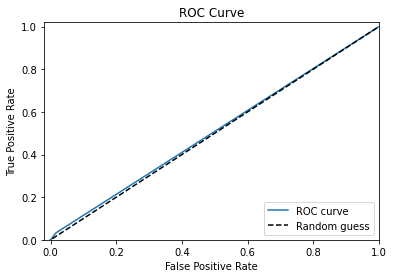

In [69]:
from sklearn.metrics import roc_curve
def show_roc_curve(y_test, y_predict):
    fpr, tpr, thresholds = roc_curve(y_test,y_predict)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([-1, 1], [-1, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc="lower right")
    plt.show()

show_roc_curve(y_test,pred)

In [70]:
from sklearn.metrics import log_loss
log_loss(y_test, pred)

2.713249095103411

In [71]:
#Hypter Parameter tuing finding optimal params 
clf_gridSearch = GridSearchCV(SVC(gamma='auto'), { 
    "C": [1,10,20],
    "kernel":["rbf", "linear","ploy"]
   }, cv=5, return_train_score=False)

clf_gridSearch.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear', 'ploy']})

In [72]:
df_clf_gridSearch_reault = pd.DataFrame(clf_gridSearch.cv_results_)
df_clf_gridSearch_reault

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.164734,0.011171,0.068416,0.004935,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.933121,0.933121,0.936102,0.932907,0.932907,0.933632,0.001239,1
1,0.185006,0.033855,0.012931,0.000279,1,linear,"{'C': 1, 'kernel': 'linear'}",0.538217,0.805732,0.875399,0.792332,0.916933,0.785723,0.131880,4
2,0.007116,0.000125,0.000000,0.000000,1,ploy,"{'C': 1, 'kernel': 'ploy'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.161107,0.006840,0.073711,0.006952,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.707006,0.901274,0.932907,0.926518,0.932907,0.880123,0.087340,2
4,0.179152,0.024551,0.012862,0.000316,10,linear,"{'C': 10, 'kernel': 'linear'}",0.538217,0.799363,0.875399,0.792332,0.916933,0.784449,0.131711,5
5,0.007031,0.000170,0.000000,0.000000,10,ploy,"{'C': 10, 'kernel': 'ploy'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,0.163312,0.004467,0.072252,0.005380,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.707006,0.901274,0.932907,0.926518,0.932907,0.880123,0.087340,2
7,0.176219,0.025764,0.013308,0.001023,20,linear,"{'C': 20, 'kernel': 'linear'}",0.538217,0.799363,0.875399,0.792332,0.916933,0.784449,0.131711,5
8,0.009799,0.002209,0.000000,0.000000,20,ploy,"{'C': 20, 'kernel': 'ploy'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [73]:
df_clf_gridSearch_reault[["param_C", "param_kernel","params","mean_test_score"]]

,param_C,param_kernel,params,mean_test_score
0,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.933632
1,1,linear,"{'C': 1, 'kernel': 'linear'}",0.785723
2,1,ploy,"{'C': 1, 'kernel': 'ploy'}",NaN
3,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.880123
4,10,linear,"{'C': 10, 'kernel': 'linear'}",0.784449
5,10,ploy,"{'C': 10, 'kernel': 'ploy'}",NaN
6,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.880123
7,20,linear,"{'C': 20, 'kernel': 'linear'}",0.784449
8,20,ploy,"{'C': 20, 'kernel': 'ploy'}",NaN


In [74]:
dir(clf_gridSearch)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs

In [75]:
print("Best Score : ", clf_gridSearch.best_score_)
print("Best Param for svc: ", clf_gridSearch.best_params_)

Best Score :  0.9336317942247817
Best Param for svc:  {'C': 1, 'kernel': 'rbf'}


In [76]:
#same as Randomize Search Parameter tuning optimal value
clf_randomizedSearch = RandomizedSearchCV(SVC(gamma='auto'), { 
    "C": [1,10,20],
    "kernel":["rbf", "linear","ploy"]
   }, cv=5, return_train_score=False, n_iter=9)
clf_randomizedSearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=9,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear', 'ploy']})

In [77]:
pd.DataFrame(clf_randomizedSearch.cv_results_)[["param_C", "param_kernel","params","mean_test_score"]]

,param_C,param_kernel,params,mean_test_score
0,1,rbf,"{'kernel': 'rbf', 'C': 1}",0.933396
1,1,linear,"{'kernel': 'linear', 'C': 1}",0.861291
2,1,ploy,"{'kernel': 'ploy', 'C': 1}",NaN
3,10,rbf,"{'kernel': 'rbf', 'C': 10}",0.932482
4,10,linear,"{'kernel': 'linear', 'C': 10}",0.861291
5,10,ploy,"{'kernel': 'ploy', 'C': 10}",NaN
6,20,rbf,"{'kernel': 'rbf', 'C': 20}",0.932482
7,20,linear,"{'kernel': 'linear', 'C': 20}",0.861291
8,20,ploy,"{'kernel': 'ploy', 'C': 20}",NaN


In [78]:
print("Best Score : ", clf_randomizedSearch.best_score_)
print("Best Param for svc: ", clf_randomizedSearch.best_params_)

Best Score :  0.933395599833956
Best Param for svc:  {'kernel': 'rbf', 'C': 1}


In [79]:
#Best Model Tuning Technique
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
score_result=[]
model_params = {
    'SVM': {'model':SVC(gamma='auto'),
            'params': {
                'C': [1,5,10,20],
                'kernel':['rbf', 'linear'] 
            }
           },
    'Random_Forest': {
        'model': RandomForestClassifier(random_state=1),
        'params': {
            'n_estimators':[1,5,10]
           }
         },
    'Logistic_Regression': {
        'model': LogisticRegression(solver='liblinear', random_state=0),
        'params':{
            'C':[1,5]
        }
    },
    'KNN_Classifier': {
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,5,'None']
        }
    }
    
}

for model_name, mp in model_params.items():
    gd_clf = GridSearchCV(mp['model'], mp['params'],cv =5,return_train_score=False)
    gd_clf.fit(X_train,y_train)
    score_result.append({'Model': model_name,
                         'Best_Score': gd_clf.best_score_,
                         'Best_params':gd_clf.best_params_
                        })
    

pd_model = pd.DataFrame(score_result, columns=['Model','Best_Score','Best_params'])

In [80]:
pd_model

,Model,Best_Score,Best_params
0,SVM,0.933396,"{'C': 1, 'kernel': 'rbf'}"
1,Random_Forest,0.931569,{'n_estimators': 10}
2,Logistic_Regression,0.873159,{'C': 1}
3,KNN_Classifier,0.929743,{'n_neighbors': 5}


In [81]:
#Q6 C Pikle model feature
import pickle5 as pickle
pickle.dump(knn, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)
pickled_score = pickled_model.score(X_test, y_test)
print("Predition:", pickled_model.predict(X_test))
print("\n Score:",pickled_score)

Predition: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.

this observation will found  different lable of singnal verification  Finnaly found 93% singnal are reached in echo house but 7% singale are fail. still we can improved by adding more signal-tower and new technoloy semiconder devices to improved the 100% signal to customer